In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import gmplot
sns.set(style="whitegrid")

In [5]:
#load dataset
raw_df = pd.read_csv('Madison_crash_2009_2019.csv')

/Library/Python/3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
raw_df.ACCDLOC.unique()

array(['N', 'I'], dtype=object)

In [7]:
#Check null value
raw_df.isna().sum()

DOCTNMBR              0
ACCDDATE              0
NTFYHOUR              0
REGION                0
COUNTY                0
                  ...  
DRVRPC2           45775
STNM21            16884
STNM22            18021
WISLR_LATDECDG     3550
WISLR_LONDECDG     3550
Length: 66, dtype: int64

In [8]:
plotly.offline.init_notebook_mode(connected = True)
mapbox_access_token = 'pk.eyJ1IjoicnlhbnlhbmciLCJhIjoiY2swaDI5cmt0MDdpeTNkcDhwdDFmMmgwMyJ9.k-gVR4ZYPtS4YVranuGJXA'
#get data with lat and long
loc_na_dropped_df = raw_df.dropna(subset=['WISLR_LATDECDG', 'WISLR_LONDECDG'])
lat = loc_na_dropped_df['WISLR_LATDECDG']
lon = loc_na_dropped_df['WISLR_LONDECDG']
fig = go.Figure(go.Scattermapbox(lat = lat, lon = lon,
                         mode = 'markers',
                         marker = go.scattermapbox.Marker(size=3,color='rgb(255, 0, 0)'),
                         text = loc_na_dropped_df['ACCDSVR']))
fig.update_layout(title = 'Car Accident in City of Madison',
                   autosize = True,
                   hovermode = 'closest',
                   showlegend = False,
                   mapbox = dict(accesstoken = mapbox_access_token,
                                 bearing = 0,
                                 center = dict(lat = 43.07, lon = -89.43),
                                 pitch = 0,
                                 zoom = 9.5,
                                 style = 'light'))
plotly.offline.iplot(fig)

When we zoom in the figure, it is clearly that red dots cluster in intersection areas, especially intersection of highways. Also, highway entrance and exit are the places where car crash happened a lot. And lots of red dots cluster in madison downtown which may indicate a possitive relation between car accident and car/pedestrian flow.

Text(0, 0.5, 'Num of Accd')

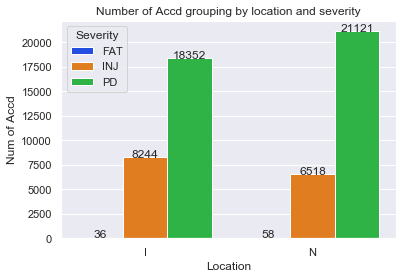

In [9]:
LOC_SVR = raw_df.groupby(['ACCDLOC','ACCDSVR']).count()['DOCTNMBR'].to_frame().reset_index()
sns.set(font_scale=1)
LOC_SVR_plot = sns.barplot(x='ACCDLOC', y='DOCTNMBR', hue='ACCDSVR', data=LOC_SVR, palette = 'bright')
LOC_SVR_leg = LOC_SVR_plot.get_legend_handles_labels()[0]
LOC_SVR_plot.legend(LOC_SVR_leg, ['FAT', 'INJ', 'PD'], title='Severity')
for patch in LOC_SVR_plot.patches:
    cnt = patch.get_height()
    LOC_SVR_plot.text(patch.get_x() + patch.get_width()/2.,cnt + 3,s = int(cnt), ha="center") 
LOC_SVR_plot.set_title('Number of Accd grouping by location and severity', fontsize = 12)
LOC_SVR_plot.set_xlabel('Location', fontsize = 12)
LOC_SVR_plot.set_ylabel('Num of Accd', fontsize = 12)

There should be four accident location category: Intersection, Non-intersection, Parking lot and Private property. However, in this dataset there are no records on parking lot and private property. In both intersection and non-intersection situation, property damage happened two times more than other accident type. The number of fatal accidents are much smaller than others. But it is important to extract fatal data and analyze them.